##### <font color='red'>Warning:</font> The following code modifies data, code, and fitting files. Proceed with caution. ######

#### Import functions ####

In [1]:
from ipynb.fs.full.utilities import *

#### Example ####

In [3]:
# Generate the timing data files (.txt)

# First, save the bigWig file under data/bigwig_files/{cell_line}.bw for a given cell_line
# You can skip this if data/whole-genome_timing_data and data/whole-genome_missing_data files already exist for this cell line
# Make sure the directories exist (use data folder)

# Example for HUVEC
cell_line = "HUVEC"
cell_lines = [cell_line]
chr_numbers = range(1, 23)

# Loop over cell lines, chromosomes, and intervals
for cell_line in cell_lines:
    for chr_number in chr_numbers:
        file_name = f'{cell_line}_chr[{chr_number}]'
        print(f'{cell_line} - chr {chr_number}', end="\r")
        datagenBigWig(cell_line, chr_number, 0, 1, resolution=1000, alld=True, dtscale=6, saveQ=True, info=file_name)

In [6]:
# Fit the firing rates

# Pick a chromosome location to fit
chr_number = 1
chrpos_min = 20100
chrpos_max = 50000
x = np.linspace(chrpos_min, chrpos_max, chrpos_max - chrpos_min)  # Chromosome positions
fork_speed = 1.4 # Fork speed
resolution = 1000 # (1 kb)
scale_factor = 6 # Scales the data
all_dataQ = False # Picks whether to fit an entire genome


# Fitting parameters
int_width = 2000
def int_widthf(time_data): return int(len(time_data)/int_width)
fit_step = 2
iterations = 100
err_threshold = 15

# Saving (Warning: replaces existing files)
saveQ = True
file_name = f'{cell_line}_chr[{chr_number}]' if all_dataQ else f'{cell_line}_chr[{chr_number}]_{chrpos_min}-{chrpos_max}'

# Data generation
time_data = datagenfs(cell_line, chr_number, chrpos_min, chrpos_max, resolution, all_dataQ, scale_factor, saveQ, file_name)

# Fitting
fire_rates, time_sim = fitfunction(time_data, fork_speed, int_widthf(time_data), fit_step, iterations, err_threshold, saveQ, file_name)

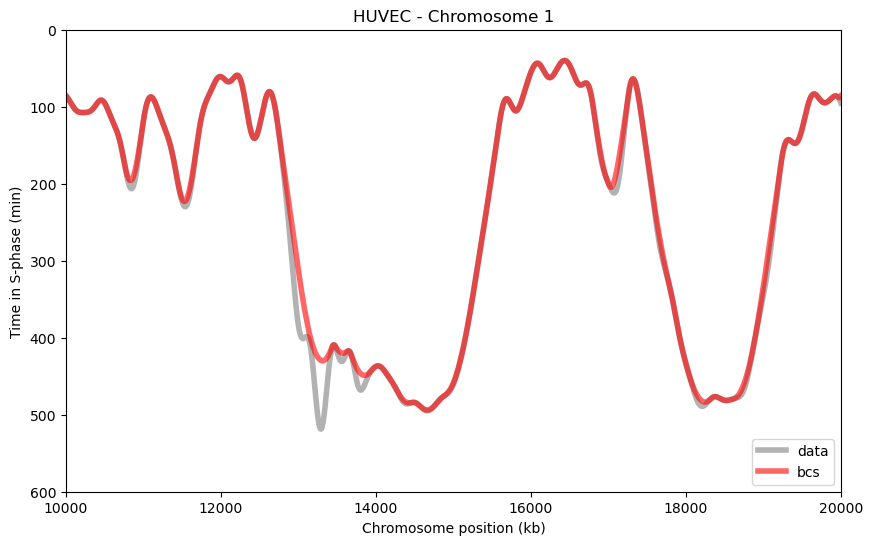

In [5]:
# Visualize the fitted timing curve

file_name = f'{cell_line}_chr[{chr_number}]_{chrpos_min}-{chrpos_max}'
spec_fileQ = True
saveQ = False # Option to save the plot
rt_plotf(cell_line,chr_number,chrpos_min,chrpos_max,scale_factor,file_name,spec_fileQ,saveQ)

#### Data generation ####

In [ ]:
### Generate timing and missing data (replace bigWig and MAT files) ###
# Skip if data/whole-genome_timing_data and data/whole-genome_missing_data files already exist

# Define cell lines
cell_lines_BigWig = ["HUVEC"]
cell_lines_HighRes = ["H1"]
cell_lines = cell_lines_BigWig + cell_lines_HighRes
chr_numbers = range(1, 23)

# Loop over cell lines, chromosomes, and intervals
for cell_line in cell_lines:
    for chr_number in chr_numbers:
        file_name = f'{cell_line}_chr[{chr_number}]'
        print(f'{cell_line} - chr {chr_number}', end="\r")
        if cell_line in cell_lines_BigWig:
            datagenBigWig(cell_line, chr_number, 0, 1, resolution=1000, alld=True, dtscale=6, saveQ=True, info=file_name)
        elif cell_line in cell_lines_HighRes:
            datagenHighRes(cell_line, chr_number, 0, 1, resolution=1000, alld=True, dtscale=6, saveQ=True, info=file_name)

In [2]:
### Generate RNA-seq (replace bigWig files) ###
# Skip if data/rna-seq_files/ files already exist
cell_line = "HUVEC"
chr_numbers = range(1,23)
for chr_number in chr_numbers:
    file_name = cell_line+'_chr['+str(chr_number)+']'
    datagenBigWig_RNA(cell_line, chr_number, 0, 1, 1000, alld=True, saveQ=True, info=file_name)

In [2]:
### Generate GRO-seq (replace bed files) ###
# Skip if data/gro-seq_files/ files already exist
cell_line = "HUVEC"
chr_numbers = range(1,23)
for chr_number in chr_numbers:
    datagenBedgraph_GRO(cell_line, chr_number, saveQ=True)

In [3]:
### Generate DNase-I HS (replace narrowPeak files) ###
cell_line = "HUVEC"
datagennarrowPeak_DHS(cell_line, saveQ=True)

In [ ]:
# Apparent replication rate ("fork speed")
cell_lines = ["HUVEC","H1"]
chr_numbers = range(1,23)
for cell_line in cell_lines:
    for chr_number in chr_numbers:
        timedata = load_function(cell_line, chr_number, "time_data")
        timesim = load_function(cell_line, chr_number, "time_sim")
        datagen_speed(cell_line, chr_number, timedata, timesim)

#### Fitting ####

In [ ]:
# Model parameters
cell_line = "HUVEC"
chr_number = 1
hpcQ = False # Option to run in HPC for whole-genome results
if hpcQ:
    parser = argparse.ArgumentParser()
    parser.add_argument("-cl", required=False)
    parser.add_argument("-cn", required=False)
    args = parser.parse_args()
    if len(sys.argv)>1 :
        if '-cl' in sys.argv:
            cell_line = str(args.cl)
        if '-cn' in sys.argv:
            chr_number = int(args.cn)

chrpos_min = 10000
chrpos_max = 20000
x = np.linspace(chrpos_min, chrpos_max, chrpos_max - chrpos_min)  # Chromosome positions
fork_speed = 1.4 # Fork speed
resolution = 1000 # (1 kb)
scale_factor = 6 # Scales the data
all_dataQ = False # Picks whether to fit an entire genome


# Fitting parameters
int_width = 2000
def int_widthf(time_data): return int(len(time_data)/int_width)
fit_step = 2
iterations = 100
err_threshold = 15

# Saving (Warning: replaces existing files)
saveQ = False
file_name = f'{cell_line}_chr[{chr_number}]' if all_dataQ else f'{cell_line}_chr[{chr_number}]_{chrpos_min}-{chrpos_max}'

# Single files
sing_filesQ = True
if sing_filesQ:
    # Data generation
    time_data = datagenfs(cell_line, chr_number, chrpos_min, chrpos_max, resolution, all_dataQ, scale_factor, saveQ, file_name)
    # Fitting
    fire_rates, time_sim = fitfunction(time_data, fork_speed, int_widthf(time_data), fit_step, iterations, err_threshold, saveQ, file_name)

# Multiple file fitting (long computation)
mult_fileQ = False
if mult_fileQ:
    # Whole-genome parameters
    cell_lines = ["HUVEC"]
    chr_range = range(1,23)
    for cell_line_i in cell_lines:
        for chr_number_i in chr_range:
            print(cell_line_i+' chr '+str(chr_number_i)+'/22')
            file_name = cell_line_i+'_chr['+str(chr_number_i)+']' if all_dataQ else cell_line_i+'_chr['+str(chr_number_i)+']_'+str(chrpos_min)+'-'+str(chrpos_max)
            # Data generation
            time_data = datagenfs(cell_line_i, chr_number_i, chrpos_min, chrpos_max, resolution, all_dataQ, scale_factor, saveQ, file_name)
            # Fitting
            fire_rates, time_sim = fitfunction(time_data, fork_speed, int_widthf(time_data), fit_step, iterations, err_threshold, saveQ, file_name)

#### bedgraph file generation ####

In [2]:
data_types = ['error', 'fire_rates']

cell_lines = ["HUVEC"]
genome_build = 'hg19'
for data_type in data_types:
    for cell_line in cell_lines:
        txt_to_bedgraph(cell_line, data_type=data_type, genome_build=genome_build)

cell_lines = ["H1","H9","HCT"]
genome_build = 'hg38'
for data_type in data_types:
    for cell_line in cell_lines:
        txt_to_bedgraph(cell_line, data_type=data_type, genome_build=genome_build)

#### BCS file generation ####

In [ ]:
# Skip if data/bcs_scripts files already exist
# These should be run using Beacon Calculus. HPC recommended.
# Single files #
sing_filesQ = False
if sing_filesQ:

    cell_line = "HUVEC"
    chr_number = 1
    chrpos_min = 3000
    chrpos_max = 3200
    fork_speed = 1.4
    resolution = 1000 # (1 kb)
    fire_rates = np.loadtxt('data/whole-genome_firing_rates/fire_rates_' + cell_line + '_chr[' + str(chr_number) + '].txt', dtype='float64')[chrpos_min:chrpos_max]
    
    bcs_gen(cell_line, chr_number, chrpos_min, chrpos_max, fork_speed, fire_rates, resolution)

# Multiple bcs generation (long computation) #
mult_fileQ = False
if mult_fileQ:
    
    cell_lines = ["HUVEC","H1"]
    chr_range = range(1,23)
    fork_speed = 1.4
    resolution = 1000
    
    for cell_line_i in cell_lines:
        
        for chr_number_i in chr_range:
            
            fire_rates = np.loadtxt('data/whole-genome_firing_rates/fire_rates_' + cell_line_i + '_chr[' + str(chr_number_i) + '].txt', dtype='float64')
            int_step = 10000 # sets the number of bcs simulation points
            partition_intervals = [[i, min(i + int_step, len(fire_rates))] for i in range(0, len(fire_rates), int_step)]
            
            for partition_intervals_i in partition_intervals:
                
                bcs_gen(cell_line_i, chr_number_i, partition_intervals_i[0], partition_intervals_i[1], fork_speed, fire_rates[partition_intervals_i[0]:partition_intervals_i[1]], resolution)

#### BCS simulation output ####

In [ ]:
# Example usage
cell_lines = ["HUVEC"]
chr_numbers = [1]
sim_number=2

process_intervals(cell_lines, chr_numbers, sim_number=sim_number)

In [5]:
cell_lines = ["HUVEC"]
chr_numbers = [1]

compute_interorigin_intervals(cell_lines, chr_numbers)

In [4]:
# Join all 10,000 kb files into one
cell_lines = ["HUVEC"]
chr_number = 1
for cell_line in cell_lines:
    join_files(cell_line, chr_number, "fork_directionality")

#### Genome location generation ####

In [2]:
# Centromeres and telomeres
for chr_number in range(1,23):
    gen_positions_centromere_telomeres(chr_number)

In [2]:
# Fragile sites
for chr_number in range(1,23):
    for site_letter in list(string.ascii_uppercase[:13]):
        gen_positions_fragile_sites(chr_number, site_letter)

In [2]:
# Base regions
# Requires hg38.fa.gz from http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
local_genome_file = 'data/genome_regions/reference_genome/hg38.fa.gz'
gen_positions_bases(local_genome_file, chr_lengths)

In [ ]:
# Coding genes
generate_coding_intervals_and_positions()
for chr_number in range(1,23):
    process_coding_file(chr_number) 

In [1]:
# Misfit genes (whole-genome)
gene_detector_error()

# Table generator (larger misfit genes)
data_dir = "data/genome_regions/genes"
chromosome_numbers = range(1, 23)
genes_by_chromosome = {}

for chr_number in chromosome_numbers:
    file_path = f"{data_dir}/gene_error_chr[{chr_number}].txt"
    if os.path.exists(file_path):
        genes = np.loadtxt(file_path, dtype=str, ndmin=1)
        genes_by_chromosome[f"chr_{chr_number}"] = genes
    else:
        genes_by_chromosome[f"chr_{chr_number}"] = []

gene_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in genes_by_chromosome.items()]))
gene_df.to_csv("data/tables/genes_by_chromosome.csv", index=False)


In [ ]:
# Example usage for a specific chromosome
chr_number = 11
genes, fragile_sites = gene_detector_fragile_sites(chr_number)

# Print the results
for gene, site in zip(genes, fragile_sites):
    print(f"Gene {gene} overlaps with {site}")

#### GRO-Seq generation ####

In [ ]:
# Requires BED files from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM340901 (IMR90)

#### Correlations ####

In [2]:
# Example usage
cell_lines = ["K562","HUVEC","HeLa-S3"] # Requires data from other cell lines (not available)
chr_numbers = range(1,23)  # Example chromosomes
data_types1 = ["error", "fire_rates"]  # First list of data types
data_types2 = ["gro_seq", "rna_seq", "chip_seq", "DNaseIHS", "prom"]  # Second list of data types
output_file = "data/tables/correlations.csv"

# Run the correlation tests and export the results to CSV
correlation_tests_to_csv(cell_lines, chr_numbers, data_types1, data_types2, output_file, chrmin=30000, chrmax=220000, smoothQ2=True)